# Data Analysis Project

## Preparing Library

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Data Wrangling

### Gathering Data

In [19]:
from google.colab import drive
drive.mount('/content/drive')
AirQuality = pd.read_csv("drive/MyDrive/PRSA_Data_Shunyi_20130301-20170228.csv")
AirQuality.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


### Assessing Data

In [20]:
AirQuality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [21]:
AirQuality.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [22]:
print("Jumlah duplikasi: ", AirQuality.duplicated().sum())

Jumlah duplikasi:  0


In [23]:
AirQuality.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


### Cleaning Data

In [24]:
AirQuality['PM2.5'].value_counts()

3.0      824
8.0      637
10.0     624
9.0      591
7.0      577
        ... 
445.0      1
467.0      1
428.0      1
443.0      1
593.0      1
Name: PM2.5, Length: 567, dtype: int64

In [25]:
AirQuality['PM10'].value_counts()

6.0      648
5.0      431
14.0     394
13.0     383
12.0     372
        ... 
59.3       1
33.5       1
26.6       1
42.7       1
789.0      1
Name: PM10, Length: 605, dtype: int64

In [26]:
AirQuality['SO2'].value_counts()

2.0000      10335
3.0000       3202
4.0000       1689
5.0000       1272
6.0000       1122
            ...  
128.0000        1
9.9960          1
140.0000        1
12.2808         1
239.0000        1
Name: SO2, Length: 267, dtype: int64

In [27]:
AirQuality['NO2'].value_counts()

10.0000     640
13.0000     579
11.0000     573
12.0000     571
9.0000      557
           ... 
55.4310       1
69.1861       1
8.8279        1
62.4112       1
184.0000      1
Name: NO2, Length: 517, dtype: int64

In [28]:
AirQuality['CO'].value_counts()

300.0     2881
400.0     2563
200.0     2282
500.0     2239
600.0     2135
          ... 
9800.0       1
4299.0       1
4799.0       1
4599.0       1
8200.0       1
Name: CO, Length: 115, dtype: int64

In [29]:
AirQuality['O3'].value_counts()

2.0000      3478
4.0000       774
3.0000       714
5.0000       611
6.0000       550
            ... 
13.4946        1
50.1228        1
16.9218        1
80.9676        1
311.0000       1
Name: O3, Length: 961, dtype: int64

In [30]:
AirQuality['TEMP'].value_counts()

 3.000    227
-2.000    213
 1.000    203
 0.000    199
-1.000    195
         ... 
 4.675      1
 4.260      1
 2.550      1
 1.725      1
-0.650      1
Name: TEMP, Length: 985, dtype: int64

In [31]:
AirQuality['PRES'].value_counts()

1015.0    270
1017.0    259
1014.0    253
1018.0    251
1020.0    244
         ... 
1039.6      1
1040.9      1
1042.4      1
1042.2      1
1037.6      1
Name: PRES, Length: 602, dtype: int64

In [32]:
AirQuality['DEWP'].value_counts()

 17.6    157
 16.2    139
 16.8    139
 17.7    138
 17.5    137
        ... 
-30.8      1
-32.2      1
-33.1      1
-34.3      1
 27.5      1
Name: DEWP, Length: 608, dtype: int64

In [33]:
AirQuality['RAIN'].value_counts()

0.0     33702
0.1       302
0.2       143
0.3       101
0.4        84
        ...  
5.7         1
18.8        1
6.6         1
14.4        1
11.9        1
Name: RAIN, Length: 120, dtype: int64

In [34]:
AirQuality['wd'].value_counts()

NNE    4540
N      3877
NE     3351
SSE    2963
SE     2665
S      2613
NW     2446
WNW    2051
NNW    1656
SSW    1586
ENE    1416
ESE    1377
W      1177
E      1153
SW      973
WSW     737
Name: wd, dtype: int64

In [35]:
AirQuality['WSPM'].value_counts()

1.1     1975
1.3     1915
1.2     1891
1.0     1831
1.4     1682
        ... 
10.9       1
10.7       1
9.9        1
12.8       1
11.0       1
Name: WSPM, Length: 103, dtype: int64

In [36]:
AirQuality['PM2.5'].fillna(value=3.0, inplace=True)
AirQuality['PM10'].fillna(value=6.0, inplace=True)
AirQuality['SO2'].fillna(value=2.0000, inplace=True)
AirQuality['NO2'].fillna(value=10.0000, inplace=True)
AirQuality['CO'].fillna(value=300.0, inplace=True)
AirQuality['O3'].fillna(value=2.0000, inplace=True)
AirQuality['TEMP'].fillna(value=3.000, inplace=True)
AirQuality['PRES'].fillna(value=1015.0, inplace=True)
AirQuality['DEWP'].fillna(value=17.6, inplace=True)
AirQuality['RAIN'].fillna(value=0.0, inplace=True)
AirQuality['wd'].fillna(value="NNE", inplace=True)
AirQuality['WSPM'].fillna(value=1.1, inplace=True)

In [37]:
AirQuality.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Exploratory Data Analysis (EDA)

In [38]:
Cor=AirQuality.corr(numeric_only=True)
Cor.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,9.695331e-01,4.318051e-02,1.776442e-02,6.838683e-04,-0.013730,-0.046927,-0.144457,0.034105,0.039809,-0.086749,-0.126033,0.179170,-0.100229,-0.000386,0.001372
year,0.969533,1.000000e+00,-2.020099e-01,-5.569082e-03,1.164482e-15,-0.008101,-0.038398,-0.089829,0.030181,0.029674,-0.057233,-0.155466,0.186707,-0.161004,-0.003930,0.030693
month,0.043181,-2.020099e-01,1.000000e+00,1.052232e-02,4.724770e-16,-0.022770,-0.033465,-0.214234,0.010907,0.038119,-0.114148,0.131910,-0.050322,0.257261,0.015187,-0.119236
day,0.017764,-5.569082e-03,1.052232e-02,1.000000e+00,-4.489555e-17,0.004812,0.025420,0.007102,0.017462,-0.010207,0.012418,0.014502,0.028601,0.022145,-0.005649,-0.011361
hour,0.000684,1.164482e-15,4.724770e-16,-4.489555e-17,1.000000e+00,0.010903,0.055263,0.072412,0.103958,0.005517,0.289968,0.141611,-0.039722,-0.012538,0.013811,0.112248


In [39]:
group = AirQuality.groupby(by="hour").agg({
    "PM2.5": ["max", "std"],
    "PM10": ["max", "std"],
    "SO2": ["max", "std"],
    "NO2": ["max", "std"],
    "CO": ["max", "std"]
})
group.head()

PM2.5              PM10                SO2               NO2             \
        max        std    max         std    max        std    max        std   
hour                                                                            
0     623.0  91.075262  912.0  103.045822  163.0  19.573409  188.0  33.356948   
1     816.0  89.914690  951.0   99.686889  239.0  18.726565  184.0  30.462640   
2     941.0  87.603234  857.0   90.738449  157.0  17.018495  169.0  28.775103   
3     650.0  82.201724  920.0   92.165087  157.0  14.646451  172.0  27.332996   
4     707.0  79.742823  835.0   86.989989  148.0  14.285371  173.0  27.098353   

           CO               
          max          std  
hour                        
0     10000.0  1397.495755  
1      9500.0  1319.250730  
2      9600.0  1209.104355  
3      9000.0  1096.702864  
4     10000.0  1096.012816

In [40]:
date = []
for i in range(len(AirQuality.index)):
  date.append(datetime.datetime(AirQuality['year'][i],AirQuality['month'][i],AirQuality['day'][i]))
Date = pd.DataFrame(date)
AirQuality["Date"] = Date

day = []
for i in range(len(AirQuality.index)):
  if AirQuality["hour"][i] >= 1 and AirQuality["hour"][i] < 12:
    day.append(0)
  elif AirQuality["hour"][i] >= 12 and AirQuality["hour"][i] < 15:
    day.append(1)
  elif AirQuality["hour"][i] >= 15 and AirQuality["hour"][i] < 19:
    day.append(2)
  else:
    day.append(3)
Day = pd.DataFrame(day)
AirQuality["Daytime"] = Day

AirQuality.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Date,Daytime
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi,2013-03-01,3
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi,2013-03-01,0
2,3,2013,3,1,2,14.0,14.0,2.0,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi,2013-03-01,0
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,300.0,2.0,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi,2013-03-01,0
4,5,2013,3,1,4,12.0,12.0,3.0,10.0,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi,2013-03-01,0


In [41]:
AirQuality.to_csv("AirQualityClean.csv", index=False)

## Visualization & Explanatory Analysis

### Is there a relationship between PM2.5 substances and PM10 substances?

In [42]:
Cor[5:6]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,-0.01373,-0.008101,-0.02277,0.004812,0.010903,1.0,0.895662,0.458532,0.631294,0.750115,-0.118769,-0.122831,0.008445,0.111429,-0.012636,-0.26554


In [43]:
Cor["PM2.5"][6]

0.8956618492038029

Text(0.5, 1.0, 'PM2.5 vs PM10')

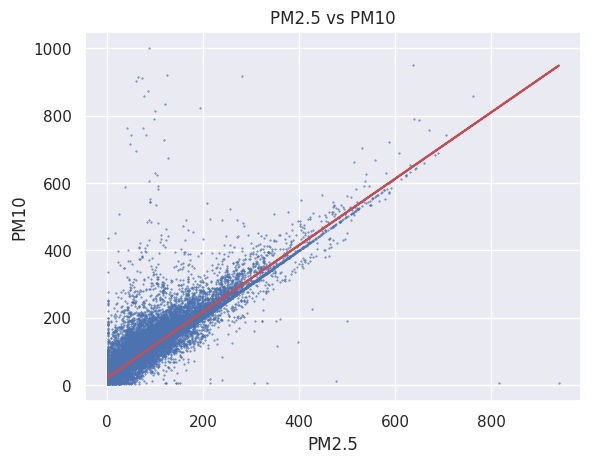

In [44]:
x = AirQuality['PM2.5']
y = AirQuality['PM10']
n = np.size(x)
m_x = np.mean(x)
m_y = np.mean(y)

SS_xy = np.sum(y*x) - n*m_y*m_x
SS_xx = np.sum(x*x) - n*m_x*m_x

b_1 = SS_xy / SS_xx
b_0 = m_y - b_1*m_x

plt.scatter(x, y,
		marker = "o", s = .2)

y_pred = b_0 + b_1*x

plt.plot(x, y_pred, color = "r")

plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.title('PM2.5 vs PM10')

### Can we classify pollutants based on the time of day?

In [45]:
compounds = [AirQuality["hour"], AirQuality["PM2.5"], AirQuality["PM10"], AirQuality["SO2"], AirQuality["NO2"], AirQuality["CO"],AirQuality["Daytime"]]
CompoundsTable = pd.DataFrame(compounds)
CTable = CompoundsTable.transpose()
CTable.head()

,hour,PM2.5,PM10,SO2,NO2,CO,Daytime
0,0.0,3.0,6.0,3.0,8.0,300.0,3.0
1,1.0,12.0,12.0,3.0,7.0,300.0,0.0
2,2.0,14.0,14.0,2.0,7.0,200.0,0.0
3,3.0,12.0,12.0,3.0,5.0,300.0,0.0
4,4.0,12.0,12.0,3.0,10.0,200.0,0.0


In [46]:
Pollutant = CTable.loc[:, 'PM2.5': 'CO']
Hour = CTable['Daytime']
from sklearn.preprocessing import StandardScaler
Pollutant_scaled = StandardScaler().fit_transform(Pollutant)

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(Pollutant_scaled)

print('Shape before PCA: ', Pollutant_scaled.shape)
print('Shape after PCA: ', pca_features.shape)

Shape before PCA:  (35064, 5)
Shape after PCA:  (35064, 2)


In [48]:
pca_df = pd.DataFrame(
    data=pca_features,
    columns=[
        'Principal Component 1',
        'Principal Component 2'
        ])

In [49]:
target_names = {
    0:'Morning', 1:'Afternoon', 2:'Evening', 3:'Night'
}

pca_df['target'] = Hour
pca_df['target'] = pca_df['target'].map(target_names)
pca_df.sample(10)

,Principal Component 1,Principal Component 2,target
14286,-0.424394,-0.285351,Morning
22946,-0.692766,-0.007106,Morning
799,0.890463,-0.333683,Morning
28802,-1.606897,-0.303397,Morning
16871,6.189365,1.867473,Night
847,-0.803037,-0.088847,Morning
29892,-1.401974,-0.043139,Afternoon
31334,-0.913229,-0.156272,Afternoon
27392,0.088725,0.576737,Morning
4455,-1.279362,0.052071,Evening


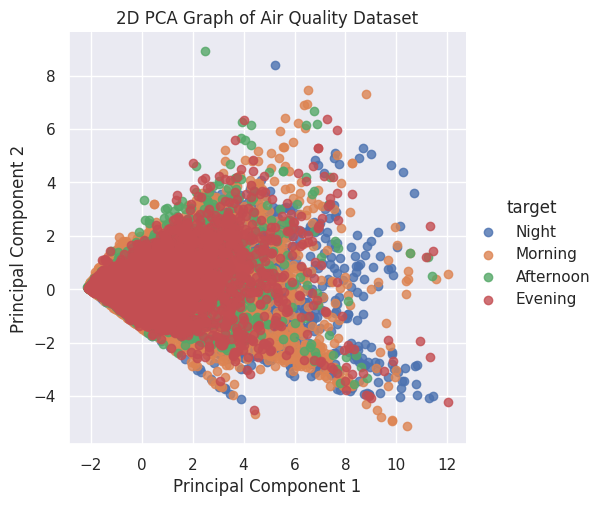

In [50]:
sns.set()
sns.lmplot(
    x='Principal Component 1',
    y='Principal Component 2',
    data=pca_df,
    hue='target',
    fit_reg=False,
    legend=True
    )

plt.title('2D PCA Graph of Air Quality Dataset')
plt.show()